# Sp22-Hw03-Python-FittingFunctions problems

## Question 1: Fitting a Fundamental Relation, or, Care Concerning Convexity

### Learning objectives
In this question you will:

- understand the subtleties involved in enforcing constraints (specifically convexity) on fitted data
- recognise numerical effects and features in fitted physical quantities
- meaningfully estimate thermodynamic quantities from noisy data


Suppose through extensive computer simulations, we have estimated and tabulated the entropy $S$ of a system at a number of different energies (for some fixed values of $V$ and $N$).  The following cells load and plot the data, which is in scaled units $k = 1$:

In [3]:
from pickle import load

with open("entropy_fitting_data.pickle","rb") as file:
    data = load(file)

Text(0, 0.5, '$S$')

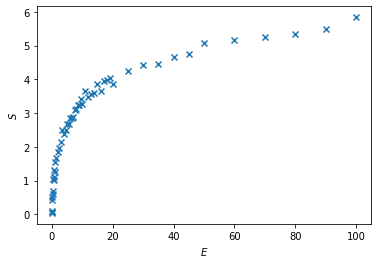

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(data["E"], data["S"],marker="x")
plt.xlabel("$E$")
plt.ylabel("$S$")



The simulations are performed at fixed and known (but non-uniformly spaced) values of energies $E_1 \le E_2 \le \dotsb \le E_{n-1} \le E_n$, but the corresponding estimated entropies $S_1, S_2, \dotsc, S_n$ are subject to some (numerical and/or statistical) error, which we will model as independent, additive, Gaussian noise with zero mean and some fixed but unknown standard deviation $\sigma$.

In the absence of an explicit functional form for the thermodynamic relation $S(E,V,N)$ (which is perhaps why we were performing the simulations in the first place), we might just try to rely on interpolation from the tabulated values. 

For the sake of simplicity, here will be content with a piecewise-linear interpolating or approximating function, but naive interpolation will not ensure that the approximating $S(E)$ function is everywhere concave down, which is required for _thermodynamic stability_.  That is, the actual thermodynamic entropy $S(E)$ must satisfy
$$
S\bigl( \lambda \,E + (1-\lambda)\, E' \bigr) \ge  \lambda\, S\bigl(E \bigr) + (1-\lambda) \,S\bigl(E' \bigr) \;\; \text{ for } 0 \le \lambda \le 1,
$$
and for any pair of accessible energies $E$ and $E'$.  When $S(E)$ is smooth, then this is equivalent to $\tfrac{\partial^2 S}{\partial E^2} \le 0$.
(At non-negative absolute temperature, $S(E)$ must also be monotonically increasing, but systems with an upper bound on energy can actually achieve negative thermodynamic temperatures, so we will not impose any monotonicity constraint explicitly.  The Third Law of thermodynamics is often taken to imply $\lim\limits_{E \to 0^+} S(E) = 0$, but this is not always the case, so will also not be imposed explicitly). 




### 1a. 



Identify every tabulated point which locally violates the concavity requirement on entropy, in the sense of lying below the line segment joining the tabulated points immediately to its left and right.



In [ ]:
#Write your answer here

### 1b. (Optional)



As a more intensive task, identify each tabulated point that violates the concavity requirement on entropy, in the broader sense of lying above at least one line segment joining a tabulated point somewhere to its left and a tabulated point somewhere to its right.






In [ ]:
#Write your answer here

### 1c. 

  Instead of using ordinary linear interpolation between the tabulated points, we can instead choose a piecewise-linear approximating function that (i) lies close to these tabulated points by some measure, but (ii) is everywhere continuous and (iii) convex.

Before reading further, we encourage you to pause and think a bit about how you might go about defining and solving this sort of approximation or interpolation problem...

 In order to find an approximation to $S(E)$ which does have the desired properties, we will borrow some ideas and techniques from what is known as _convex regression theory_, which is used mostly in economics and operations research.

First, notice that any continuous, piecewise-linear, concave-down function $f(E)$ of energy $E$ can be written as
$$
f(E) = \min\bigl[ a_1 E + b_1, a_2 E + b_2, \dotsc, a_k E + b_k  \bigr]
$$
for some number $k$ of linear segments.  Without any loss of generality, we can always sort these lines so that the successive slopes satisfy $a_1 \ge a_2 \dotsb \ge a_k$.  If $a_{j} > a_{j+1}$ striclty, then there will be a "kink" at $E = \tfrac{b_{j+1}- b_{j}}{a_j - a_{j+1}}$, where the successive lines cross.
(Note that the dependence of $f(E)$ on its  parameters is left implicit).

Because the errors in the tabulated entropies are assumed to be independent, additive, and Gaussian of equal variance, it is appropriate to choose the parameters $(a_i, b_i)$, $i = 1, \dots, k$ so as to minimize an "objective", "cost," or "loss" function consisting  of the sum of squares
$$
\mathcal{L}(a_1, b_1, \dotsc, a_k, b_k) = \sum\limits_{i=1}^{n} \bigl(\, S_i - f(E_i) \,\big)^2,
$$
subject to the constraints that $a_1 \ge a_2 \ge \dotsb \ge a_k$.

In order to try to find a minimum, one simple heuristic "partitioning" method is as follows:

1. choose the number $k$ of lines to include in the fit function, where $1 \le k \le n-1$
2. make an initial guess for the slope and intercept parameters for all $k$ line segments, for instance by first drawing lines exactly through selected pairs of tabulated points.
3. modify the slopes $a_1, a_2, \dotsc, a_k$ if needed, in order to ensure concavity.  One simple procedure is to make two copies of the current guess for the slopes of the line segments, then sweeping through one sequence in order of increasing energy, minimally adjusting any slope downward if needed to make it slightly smaller (what problems will occur if they are the same?) than the preceeding slope, next sweeping through the other copy in order from high to low energy, adjusting a slope upward as needed to make it slightly larger than that of the segment to its right, then taking the arithmetic average;
4. modify the intercepts $b_1, b_2, \dotsc, b_k$ if needed, in order to ensure that each of the $k$ lines is dominant in at least one region (even if it is very small). You can use a similar strategy to tat for the slopes.
5. assign all data points to successive energy intervals $I_1, \dotsc, I_k$, based on which linear segment of the fit function is operative (i.e., which is minimal over that interval of energy space).  It might first be helpful to find the points at which successive line segments intersect. You might fend it helpful to also add the nearest points to the right and/or left of the respective boundaries.
6.  For every energy interval $I_j$, separately solve for a linear regression line using just those data points within that interval. (Think about what to do if there are very few points in the interval.)  Use the simple linear regression formulae
$$
a_j = \frac{ \sum\limits_{i \in I_j} (E_{j_i} - \bar{E}_j )( S_{j_i} - \bar{S}_j) }{ \sum\limits_{i \in I_j} (E_{j_i} - \bar{E}_j )^2 }
$$
and
$$
b_j = \bar{S}_j - a_j \bar{E}_j,
$$
in which $\bar{E}_j = \tfrac{1}{n_j} \sum\limits_{i \in I_j} E_{j_i}$ and $\bar{S}_j = \tfrac{1}{n_j} \sum\limits_{i \in I_j} S_{j_i}$,  
where $(E_{j_i}, S_{j_i})$ is the $i$th data point assigned to the $j$th energy interval $I_j$;
7. repeat until the successive changes in all parameters are exactly zero (why does this exactly converge?).

Using this algorithm, find piecewise linear fits to the tabulated data for $k = 3$, $k = 12$, $k = 24$, $k = 36$, and $k = 48$, plotting the fits along with the tabulated values for comparison.




In [ ]:
#Write your answer here

### 1d. 

The algorithm outlined above constitutes merely a heuristic technique, which often but not aways yields acceptable results in practice.
Instead, we can use a standard least-squares minimization algorithm, particularly if we make the additional simplifying assumption that any kinks in the piecewise-linear fit are to occur only at the tabulated $E_i$ values.

That is, now consider piecewise-linear, continuous, concave fitting functions of the form
$$
f(E) = \beta_0 + \alpha_0 \,E  - \sum\limits_{i=1}^{n}  \xi_i^2 \,( E - E_i )_{+}  \;\;,
$$
where
$$
\bigl( \psi(E) \bigr)_{+} = \Theta\bigl( \psi(E) \bigr) \, \psi(E) = 
\begin{cases}
\psi(E) &\text{ if } \psi(E) \ge 0 \\
0         &\text{ otherwise }
\end{cases}
$$
denotes a thresholded version of the function $\psi(E)$.  

For $i = 1 \dotsc, n$, the $\xi_i^2$ then parameterize the jumps in slope at the tabulated energy values, and are squared to enforce the concavity constraints.  To avoid degeneracies arising from having more parameters ($n+2$ in all) than tabulated data points ($n$ in all), we need to add two additional equality constraints.  Because no tabulated data occurs below $E_1$ or above $E_n$, it is natural to extrapolate in these regions by demanding that $\xi_1 = \xi_n = 0$.

We can now use an "off-the-shelf" nonlinear least-squares package, such as the Levenberg-Marquardt algorithm implemented as part of the [least-squares functionality](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) within the optimization class of _scipy_.  You will need to supply a vector of _residuals_ $R_i = S_i - f(E_i)$ for each tabulated point $i = 1, \dotsc, n$, and the Jacobian $\tfrac{\partial R_i}{\partial \alpha_0}$, $\tfrac{\partial R_i}{\partial \beta_0}$, and $\tfrac{\partial R_i}{\partial \xi_j}$ for $j = 2 \dotsc, n-2$, as functions of the parameters, as well as an initial guess for all parameter values—be sure not to set any of the $\xi_2, \dotsc, \xi_{n-1}$ to zero initially, or they might get stuck at zero permanently even if this is not a global minimum. (If you don't supply the Jacobian, it will estimate it numerically, which is expensive in high dimensions and always inaccurate.)

  (i) Find the least-squares parameter values using the tabulated data.  (ii) Re-initialize from several different starting points to help assess convergence to a global versus local minimum.  (iii) Plot the best results along with the tabulated values for comparison.




In [ ]:
#Write your answer here

### 1e. 

  For the best result found (minimal sum-of squares), re-express your fit in the form
$$
S(E) \approx f(E) = \begin{cases}
f_1 + a_0\, (E - E_1) &\text{ if }   E < E_1 \\
f_i  + \,a_i \,(E - E_i)  &\text{ if }   E_i \le E \le E_{i+1} \;, \; i = 1, \dotsc, n-1 \\
f_n + a_n \,(E - E_n)  &\text{ if }  E_n  <  E 
\end{cases} \;,
$$
where $f_i = f(E_i)$, and the slopes $a_i = \tfrac{f_{i+1} - f_i}{E_{i+1} - E_i}$ for $i = 1, \dotsc, n-1$, can be calculated in terms of $\alpha_0$ and sums over some of the $\xi_j^2$.  Verify that $a_0 = a_1 \le a_2 \le \dotsc \le a_{n-1} = a_n$.



In [ ]:
#Write your answer here

### 1f. 



By differentiating the piecewise-linear fit to $S(E)$, estimate and plot the (scaled) temperature $\tau(E)$ as a function of $E$, where $\tau = kT$.  (But recall that $k = 1$ in our units).

HINT: there will be discontinuities at the tabulated energy values, where the entropy function exhibits kinks.




In [ ]:
#Write your answer here